In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from glob import glob

In [2]:
import seaborn as sns
import  matplotlib.pyplot as plt


### IMPORTING THE TRAINING DATA

In [3]:
filenames_list = os.listdir('C:/Users/Dell/Desktop/EEG_Alcoholics/SMNI_CMI_TRAIN/Train/')

Data = pd.DataFrame({})
for file_names in tqdm(filenames_list):
    temp_df = pd.read_csv('C:/Users/Dell/Desktop/EEG_Alcoholics/SMNI_CMI_TRAIN/Train/' + file_names)
    Data = Data.append(temp_df)

100%|██████████| 468/468 [09:52<00:00,  3.11s/it]


### IMPORTING THE TEST DATA

In [5]:
filenames_list1 = os.listdir('C:/Users/Dell/Desktop/EEG_Alcoholics/SMNI_CMI_TEST/Test/')

Data1 = pd.DataFrame({})
for file_names1 in tqdm(filenames_list1):
    temp_df1 = pd.read_csv('C:/Users/Dell/Desktop/EEG_Alcoholics/SMNI_CMI_TEST/Test/' + file_names1)
    Data1 = Data1.append(temp_df1)


 36%|███▋      | 174/480 [01:15<04:34,  1.12it/s]


 70%|███████   | 337/480 [04:21<03:37,  1.52s/it]


100%|██████████| 480/480 [08:32<00:00,  2.06s/it]

### EXPLORING AND CLEANING THE TRAINING DATA

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7667712 entries, 0 to 16383
Data columns (total 10 columns):
Unnamed: 0            int64
trial number          int64
sensor position       object
sample num            int64
sensor value          float64
subject identifier    object
matching condition    object
channel               int64
name                  object
time                  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 643.5+ MB


In [7]:
Data.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,0,FP1,0,-8.921,a,S1 obj,0,co2a0000364,0.000000
1,6,0,FP1,1,-8.433,a,S1 obj,0,co2a0000364,0.003906
2,7,0,FP1,2,-2.574,a,S1 obj,0,co2a0000364,0.007812
3,8,0,FP1,3,5.239,a,S1 obj,0,co2a0000364,0.011719
4,9,0,FP1,4,11.587,a,S1 obj,0,co2a0000364,0.015625


In [8]:
Data.dtypes

Unnamed: 0              int64
trial number            int64
sensor position        object
sample num              int64
sensor value          float64
subject identifier     object
matching condition     object
channel                 int64
name                   object
time                  float64
dtype: object

In [9]:
Data.describe()

,Unnamed: 0,trial number,sample num,sensor value,channel,time
count,7.667712e+06,7.667712e+06,7.667712e+06,7.667712e+06,7.667712e+06,7.667712e+06
mean,8.228000e+03,2.480342e+01,1.275000e+02,-2.078947e+00,3.150000e+01,4.980469e-01
std,4.748124e+03,1.935509e+01,7.390028e+01,9.789677e+00,1.847295e+01,2.886730e-01
min,5.000000e+00,0.000000e+00,0.000000e+00,-1.612960e+02,0.000000e+00,0.000000e+00
25%,4.116500e+03,1.000000e+01,6.375000e+01,-6.643000e+00,1.575000e+01,2.490234e-01
50%,8.228000e+03,1.950000e+01,1.275000e+02,-1.638000e+00,3.150000e+01,4.980469e-01
75%,1.233950e+04,3.500000e+01,1.912500e+02,2.543000e+00,4.725000e+01,7.470703e-01
max,1.645100e+04,1.070000e+02,2.550000e+02,4.538470e+02,6.300000e+01,9.960938e-01


In [10]:
Data.describe(include=np.object)

,sensor position,subject identifier,matching condition,name
count,7667712,7667712,7667712,7667712
unique,64,2,3,16
top,O1,a,S1 obj,co2c0000339
freq,119808,3850240,2621440,491520


#### Checking for null values

In [11]:
Data.isna().any().any()

False

In [12]:
Data.isnull().sum()

Unnamed: 0            0
trial number          0
sensor position       0
sample num            0
sensor value          0
subject identifier    0
matching condition    0
channel               0
name                  0
time                  0
dtype: int64

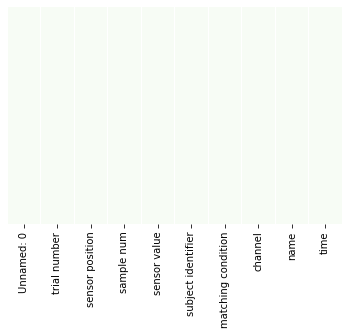

In [13]:
sns.heatmap(Data.isnull(), yticklabels = False, cbar = False, cmap='Greens')

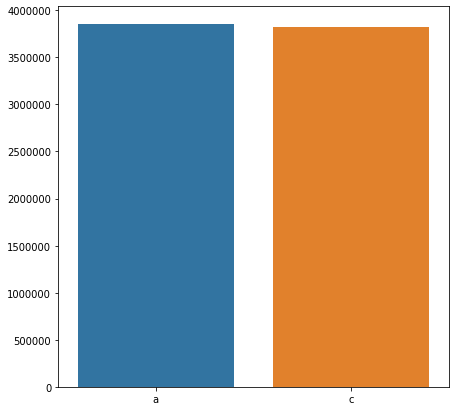

In [14]:
plt.figure(figsize=(7,7))
sns.barplot(x=Data['subject identifier'].value_counts().index,
              y=Data['subject identifier'].value_counts().values)

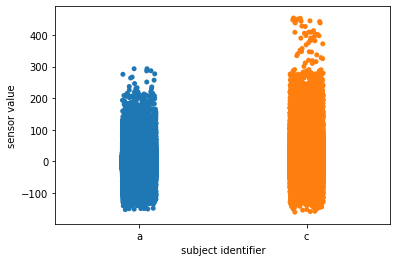

In [15]:
sns.stripplot(x="subject identifier",y="sensor value",data=Data)

In [ ]:
sns.swarmplot(x="subject identifier",y="trial number",hue="subject identifier",data=Data)
plt.show()

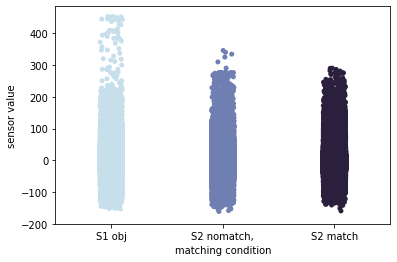

In [16]:
sns.stripplot(x="matching condition",y="sensor value",data=Data,palette="ch:s=.25,rot=-.25")

Text(0.5, 1.0, 'Alcoholic or Controlled')

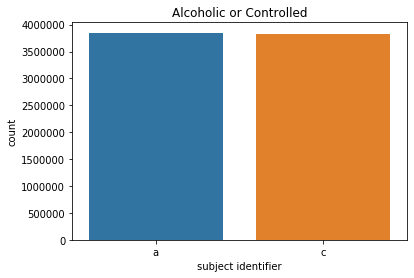

In [17]:
sns.countplot(x='subject identifier',data=Data)
plt.title('Alcoholic or Controlled')

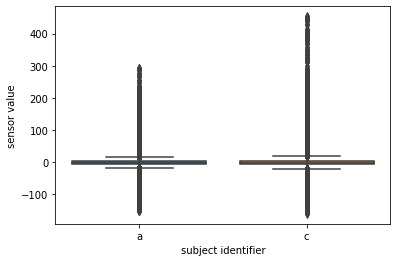

In [18]:
ax=sns.boxplot(x="subject identifier",y="sensor value",data=Data)
# plt.ylim(-50,50)

Text(0.5, 1.0, 'Name and subject identifier')

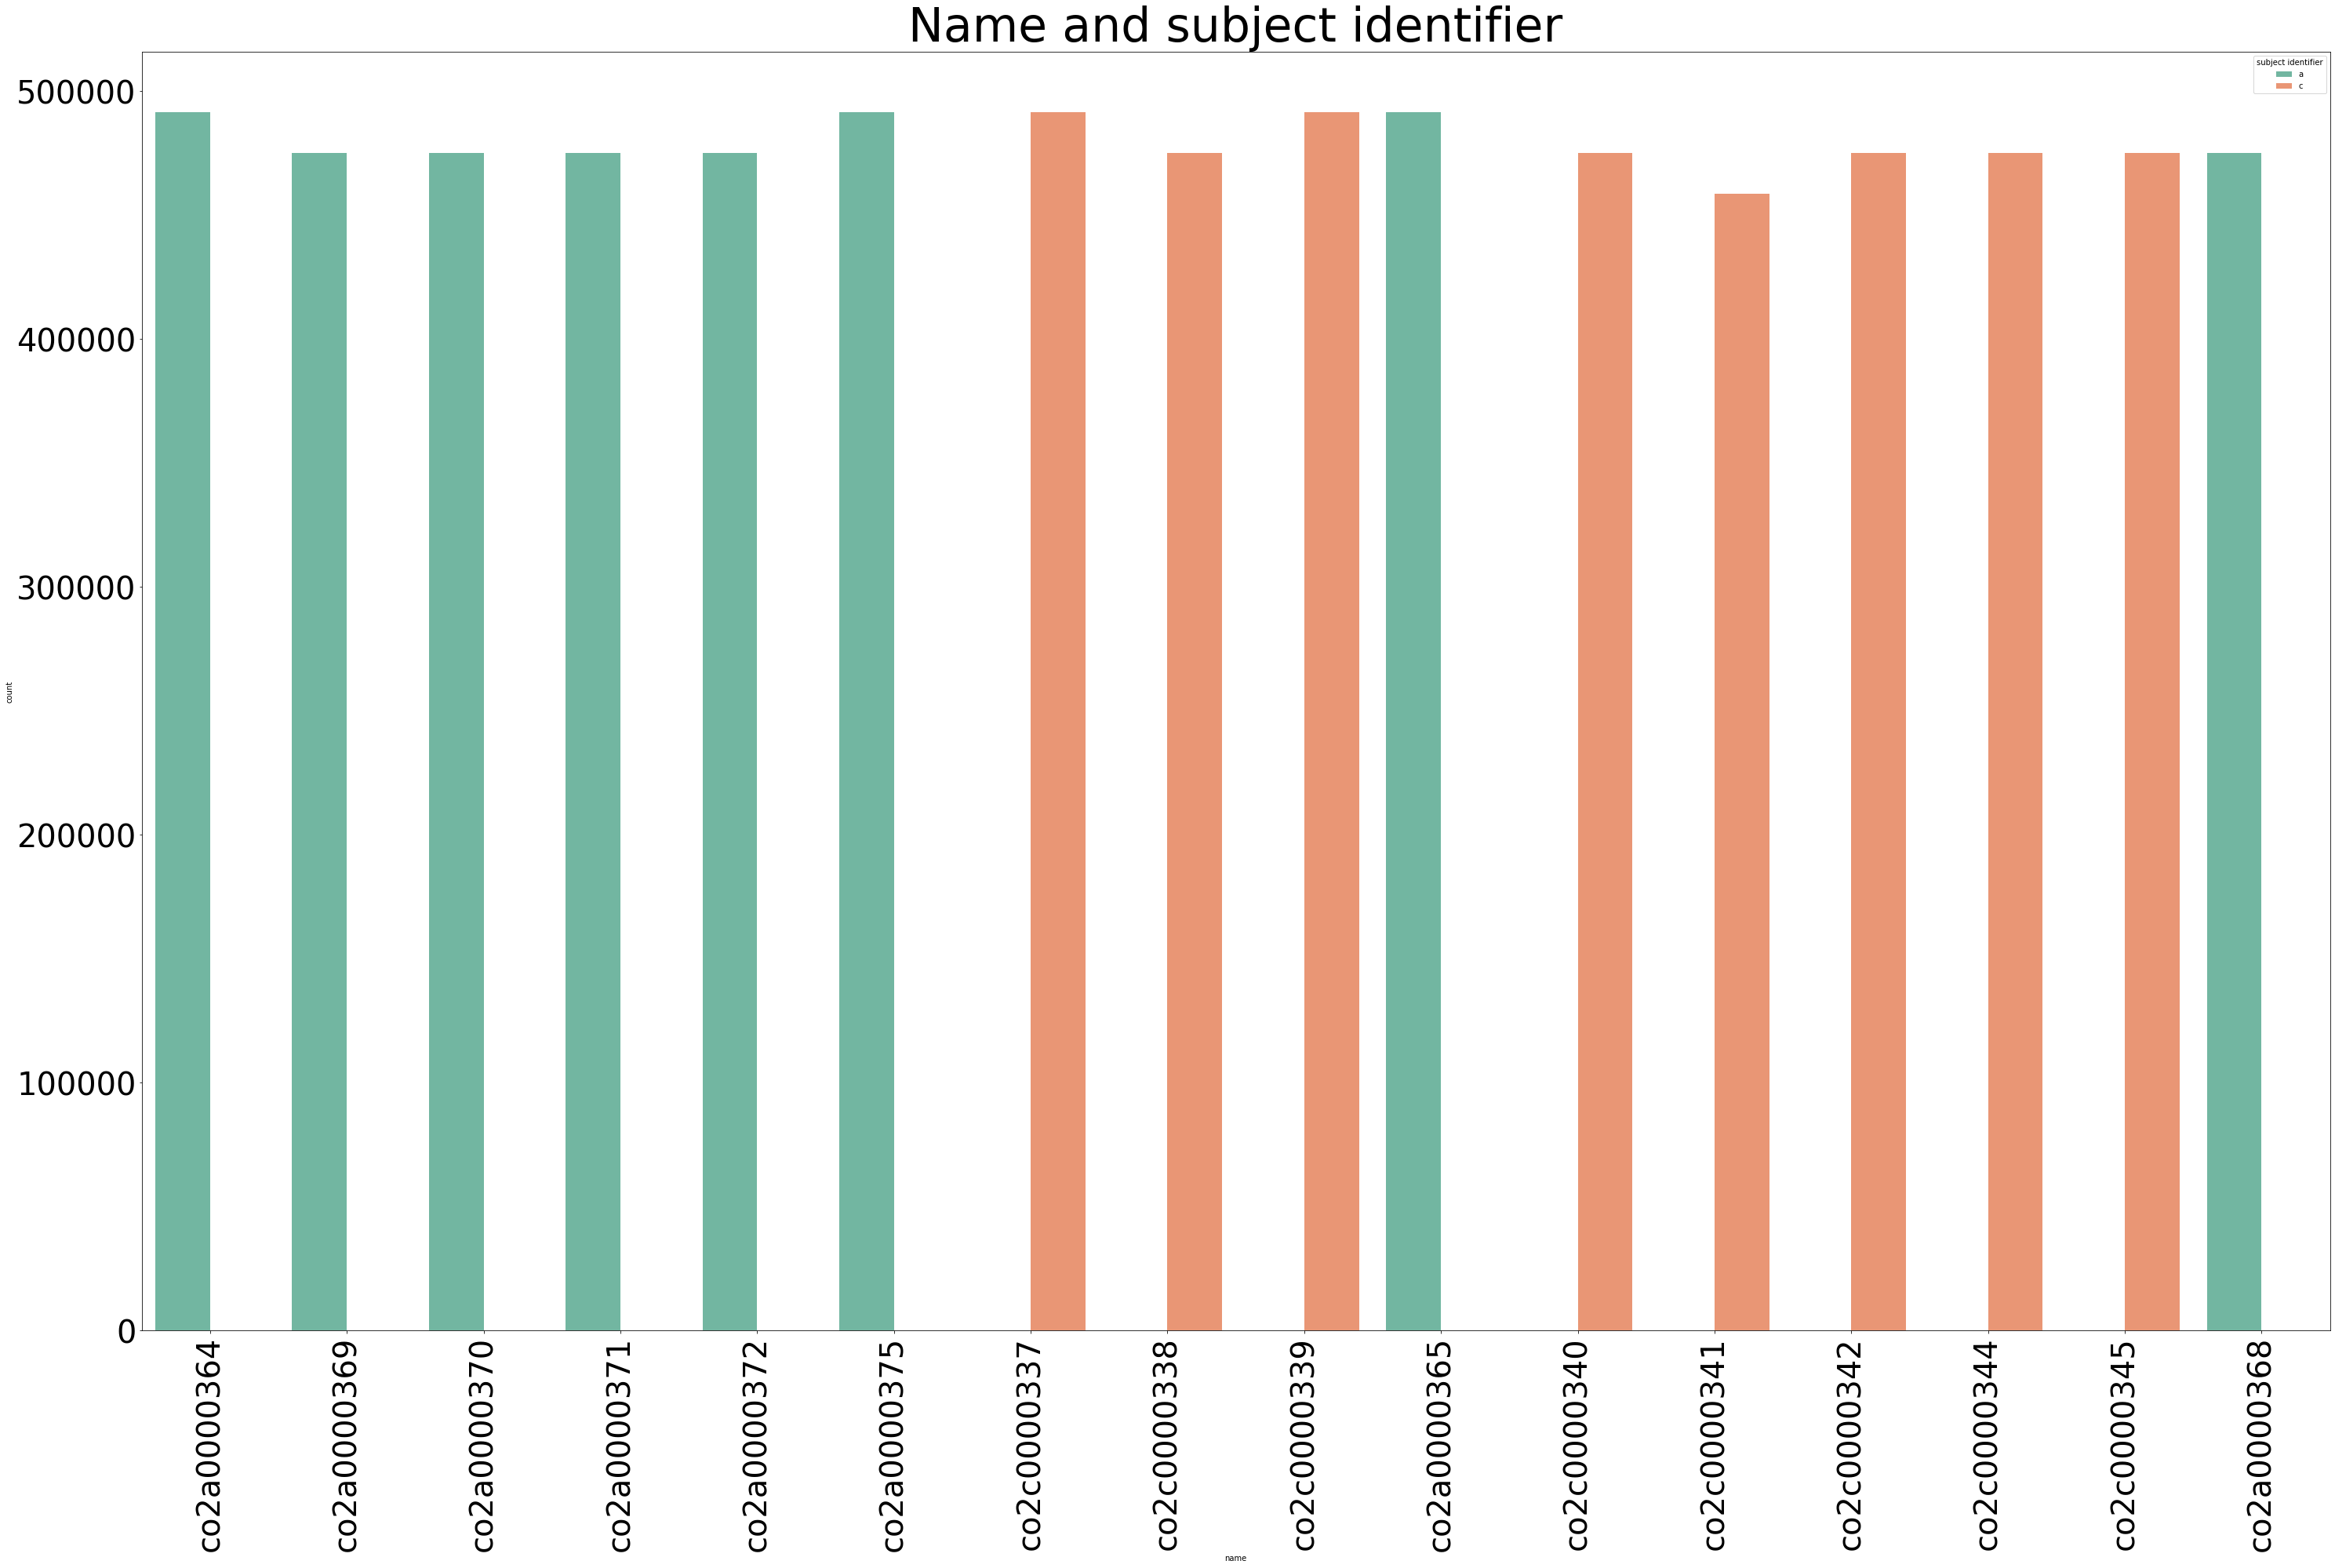

In [19]:
plt.figure(figsize=(50,30))
sns.countplot('name',data=Data,hue='subject identifier',palette="Set2",dodge=True)
plt.xticks(rotation=90)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Name and subject identifier',fontsize=60)

Text(0.5, 1.0, 'Name and matching condition')

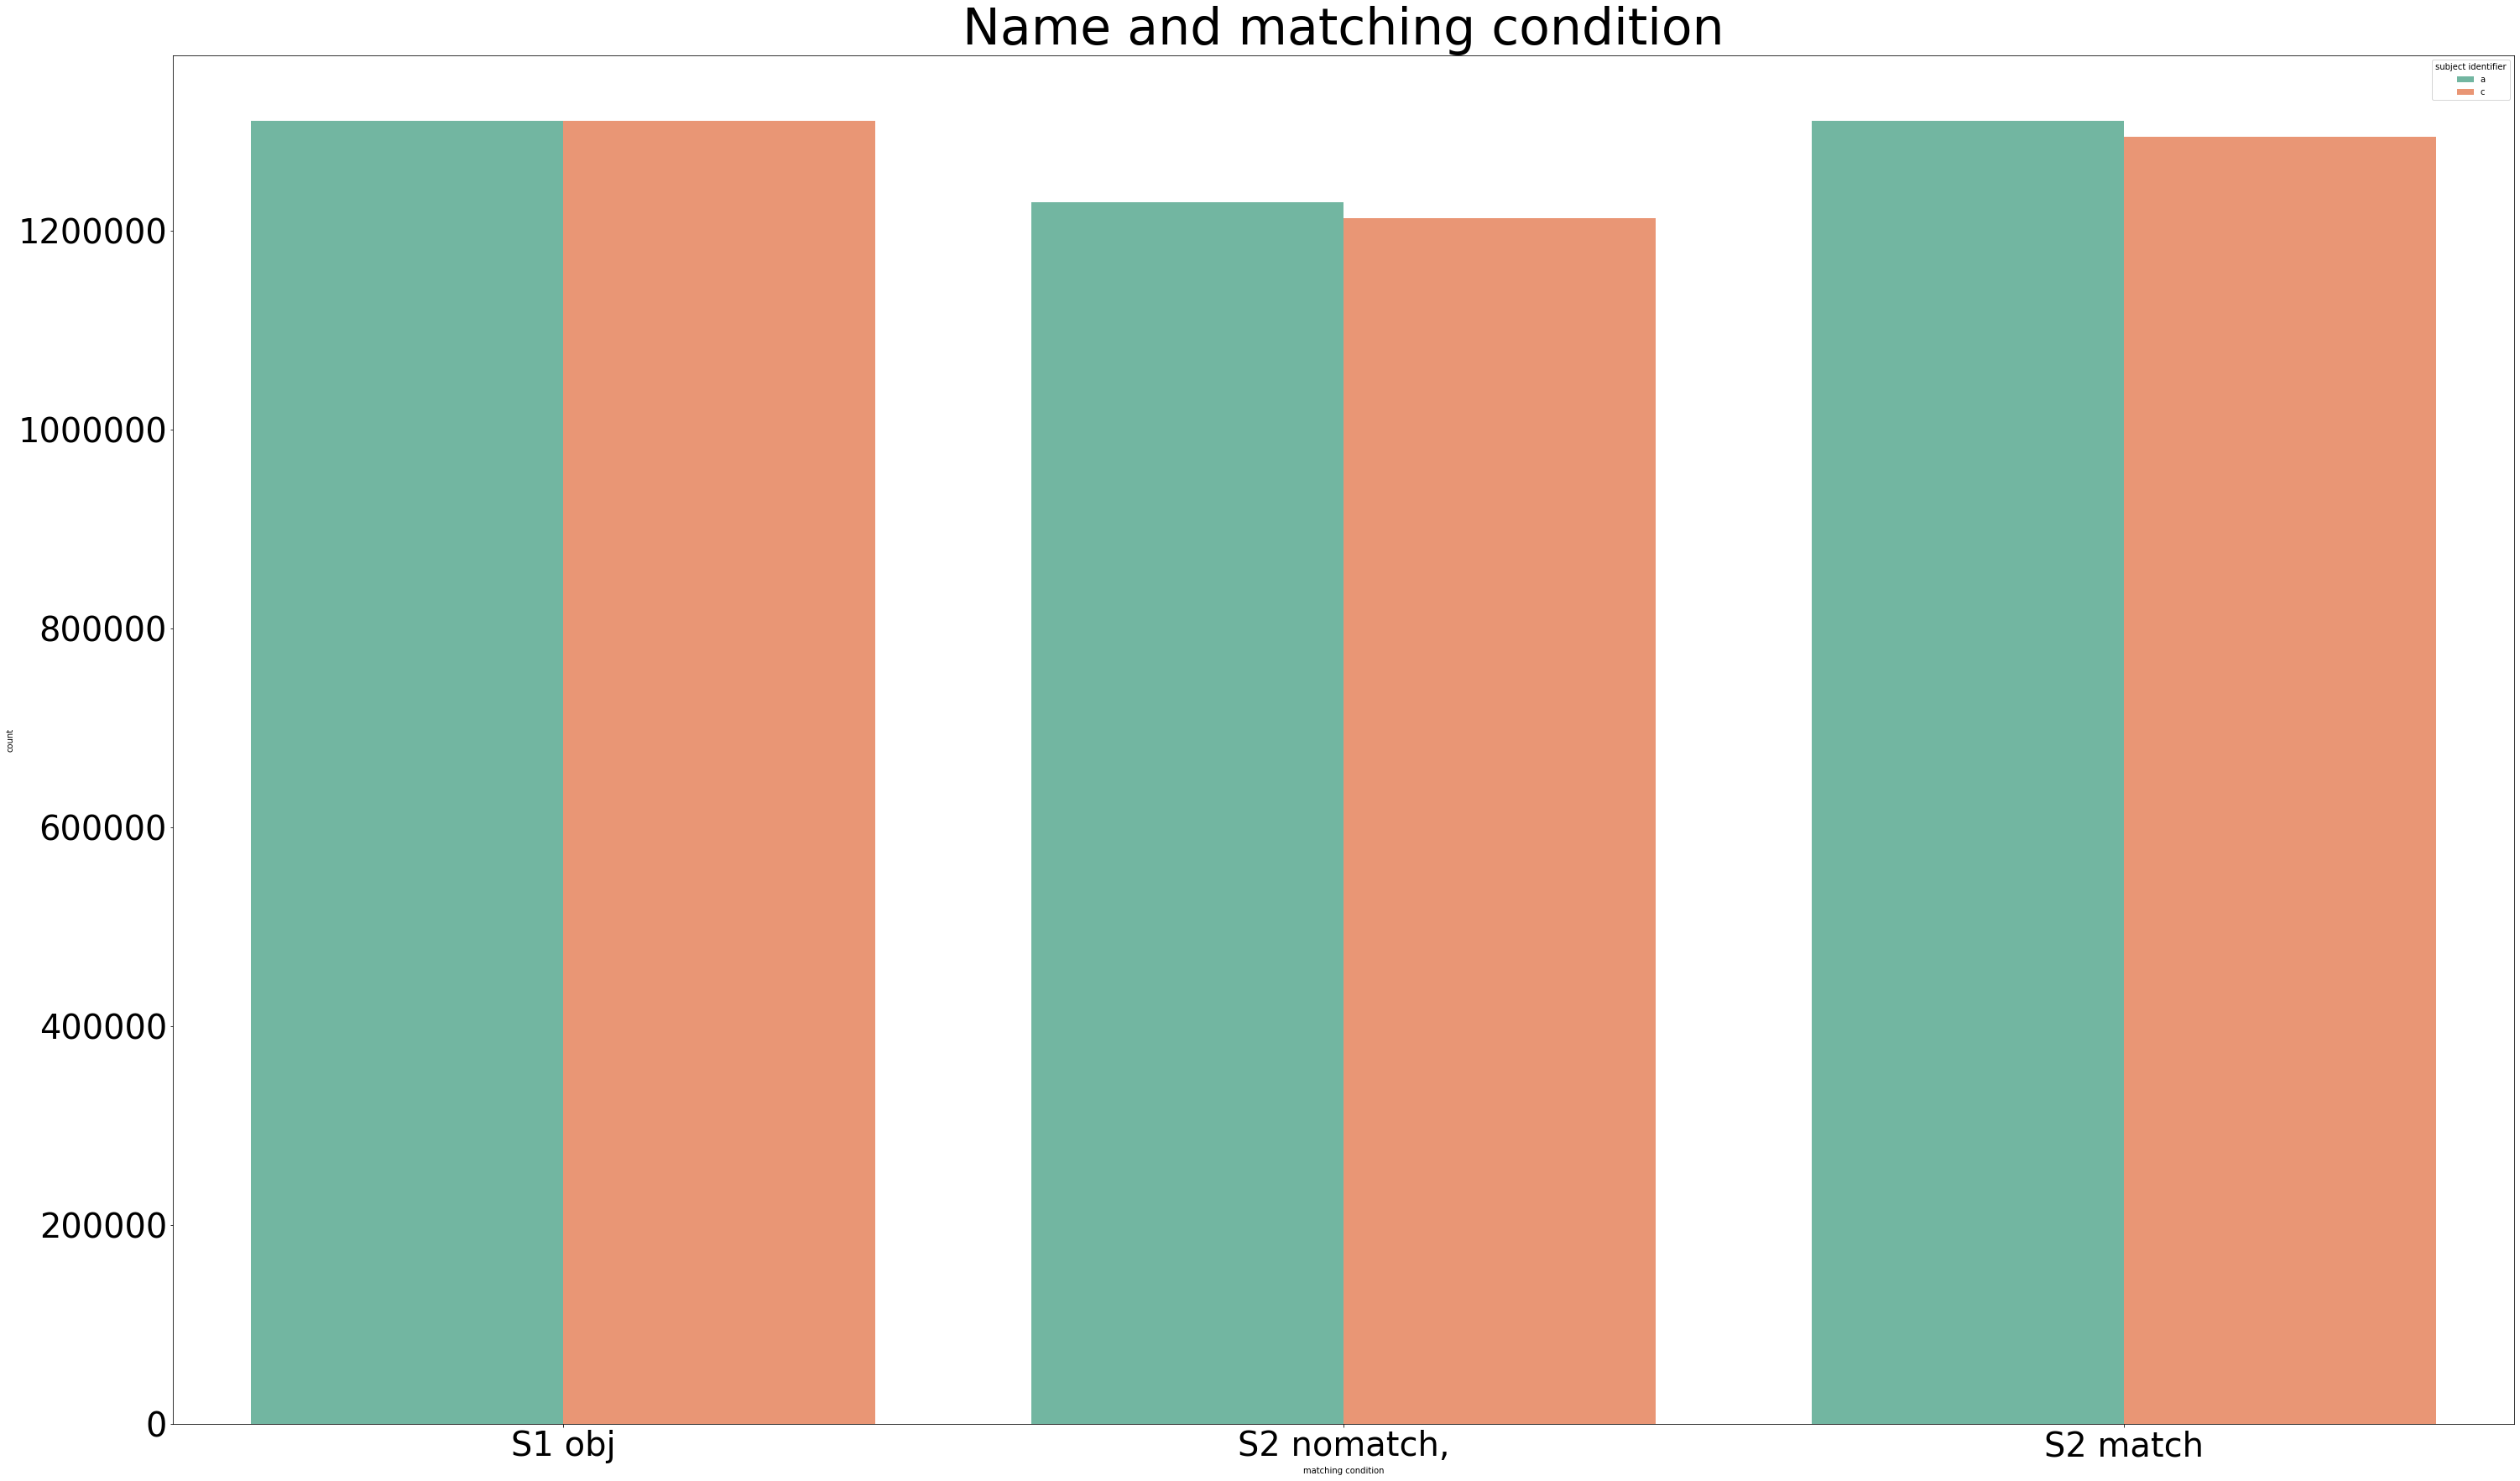

In [20]:
plt.figure(figsize=(50,30))
sns.countplot('matching condition',data=Data,hue='subject identifier',palette="Set2",dodge=True)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Name and matching condition',fontsize=60)

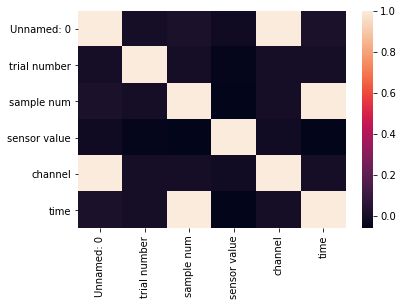

In [21]:
sns.heatmap(Data.corr())

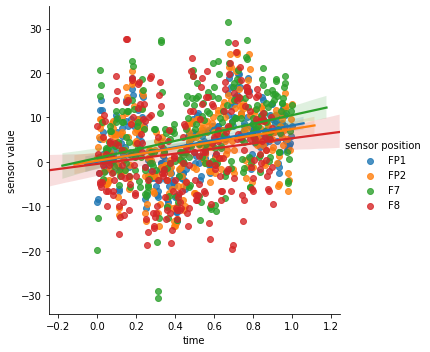

In [22]:
sns.lmplot(data=Data[:1000],x="time",y="sensor value",hue="sensor position")

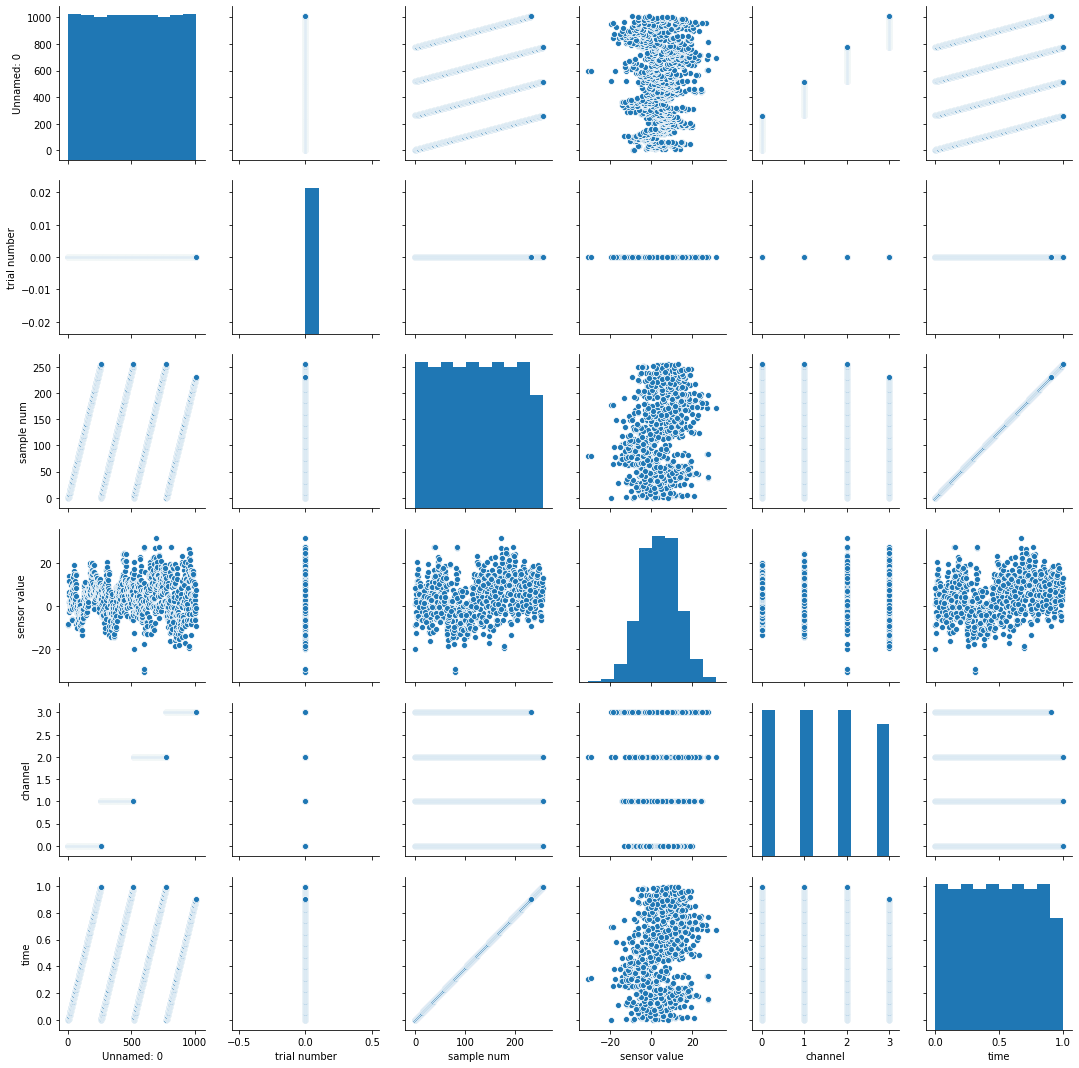

In [23]:
sns.pairplot(Data[:1000])

In [24]:
Data.shape

(7667712, 10)

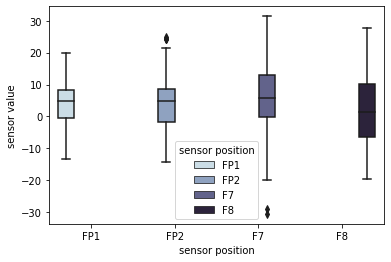

In [25]:
sns.boxplot(x="sensor position",y="sensor value", hue="sensor position", data=Data[:1000],palette='ch:s=.25,rot=-.25')

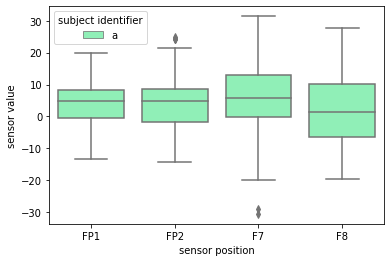

In [26]:
sns.boxplot(x="sensor position",y="sensor value", hue="subject identifier", data=Data[:1000],palette='rainbow')

### PREPROCESSING OF DATA

In [27]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [28]:
Data.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,0,FP1,0,-8.921,a,S1 obj,0,co2a0000364,0.000000
1,6,0,FP1,1,-8.433,a,S1 obj,0,co2a0000364,0.003906
2,7,0,FP1,2,-2.574,a,S1 obj,0,co2a0000364,0.007812
3,8,0,FP1,3,5.239,a,S1 obj,0,co2a0000364,0.011719
4,9,0,FP1,4,11.587,a,S1 obj,0,co2a0000364,0.015625


In [29]:
Data['sensor position'] = le.fit_transform(Data['sensor position'])
Data['subject identifier'] = le.fit_transform(Data['subject identifier'])
Data['matching condition'] = le.fit_transform(Data['matching condition'])
Data['name'] = le.fit_transform(Data['name'])

In [30]:
Data.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,0,34,0,-8.921,0,0,0,0,0.000000
1,6,0,34,1,-8.433,0,0,0,0,0.003906
2,7,0,34,2,-2.574,0,0,0,0,0.007812
3,8,0,34,3,5.239,0,0,0,0,0.011719
4,9,0,34,4,11.587,0,0,0,0,0.015625


In [31]:
Data.dtypes

Unnamed: 0              int64
trial number            int64
sensor position         int32
sample num              int64
sensor value          float64
subject identifier      int32
matching condition      int32
channel                 int64
name                    int32
time                  float64
dtype: object

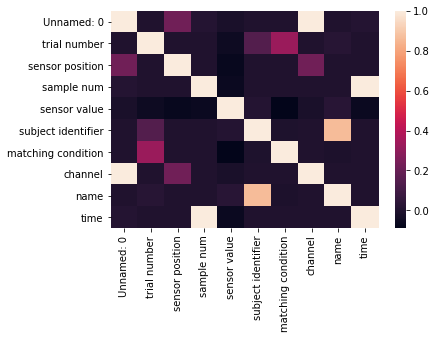

In [32]:
sns.heatmap(Data.corr())

In [33]:
Data1.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,30,FP1,0,-3.550,a,S1 obj,0,co2a0000364,0.000000
1,6,30,FP1,1,-5.015,a,S1 obj,0,co2a0000364,0.003906
2,7,30,FP1,2,-5.503,a,S1 obj,0,co2a0000364,0.007812
3,8,30,FP1,3,-3.550,a,S1 obj,0,co2a0000364,0.011719
4,9,30,FP1,4,-0.621,a,S1 obj,0,co2a0000364,0.015625


In [34]:
Data1['sensor position'] = le.fit_transform(Data1['sensor position'])
Data1['subject identifier'] = le.fit_transform(Data1['subject identifier'])
Data1['matching condition'] = le.fit_transform(Data1['matching condition'])
Data1['name'] = le.fit_transform(Data1['name'])

In [35]:
Data1.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,30,34,0,-3.550,0,0,0,0,0.000000
1,6,30,34,1,-5.015,0,0,0,0,0.003906
2,7,30,34,2,-5.503,0,0,0,0,0.007812
3,8,30,34,3,-3.550,0,0,0,0,0.011719
4,9,30,34,4,-0.621,0,0,0,0,0.015625


In [36]:
test_data=Data1.drop(['Unnamed: 0','subject identifier'],axis=1)
test_target=Data1['subject identifier']

In [37]:
test_data.shape

(7864320, 8)

In [38]:
test_target.shape

(7864320,)

### SPLITTING THE TRAINING DATASET TO TRAINING AND VALIDATION  DATA

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x,y = Data.drop(['Unnamed: 0','subject identifier'],axis=1), Data['subject identifier']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)

In [53]:
print("Shape of input data")
x.shape

Shape of input data


(7667712, 8)

In [54]:
print("Shape of target data")
y.shape

Shape of target data


(7667712,)

In [55]:
print("Shape of input training data",x_train.shape)
print("Shape of target training data",y_train.shape)
print("Shape of input validation data",x_test.shape)
print("Shape of target validation data",y_test.shape)


Shape of input training data (5750784, 8)
Shape of target training data (5750784,)
Shape of input validation data (1916928, 8)
Shape of target validation data (1916928,)


### NAIVE BAYES CLASSIFIER MODEL
#### Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. Naive Bayes classifiers work well in many real-world situations such as document classification and spam filtering.

In [66]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)
prediction_nb = nb.predict(x_test)
print(prediction_nb)
print('With Naive Bayes Classifier')
print('Accuracy is: ',nb.score(x_test,y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction_nb))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, prediction_nb)))

[1 0 1 ... 0 1 1]
With Naive Bayes Classifier
Accuracy is:  0.9981272118723291
Mean Absolute Error: 0.0018727881276709402
Root Mean Squared Error: 0.04327572215077341


[[959524   3590]
 [     0 953814]]


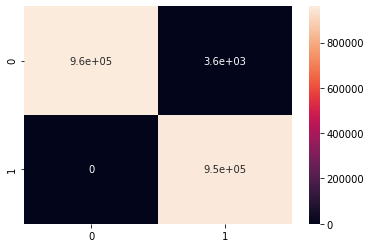

In [68]:
cm_nb = confusion_matrix(y_test, prediction_nb)
print(cm_nb)
sns.heatmap(cm_nb, annot=True)

In [69]:
print(classification_report(y_test, prediction_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    963114
           1       1.00      1.00      1.00    953814

    accuracy                           1.00   1916928
   macro avg       1.00      1.00      1.00   1916928
weighted avg       1.00      1.00      1.00   1916928



In [64]:
Score = [[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]]

In [70]:
test_prediction_nb = nb.predict(test_data)
print(test_prediction_nb)
print('With Naive Bayes, accuracy on test data is: ',nb.score(test_data,test_target))

[0 0 0 ... 0 0 0]
With Naive Bayes, accuracy on test data is:  0.9366221110026042


In [71]:
df1 = pd.DataFrame({'Actual Values': test_target, 'Predicted Values': test_prediction_nb})  
df1.head(10)

,Actual Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


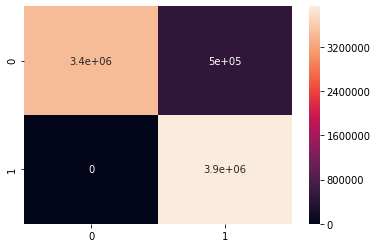

In [72]:
cm_test_nb=confusion_matrix(test_target,test_prediction_nb)
cm_test_nb
sns.heatmap(cm_test_nb, annot=True)

In [73]:
print(classification_report(test_target,test_prediction_nb))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93   3932160
           1       0.89      1.00      0.94   3932160

    accuracy                           0.94   7864320
   macro avg       0.94      0.94      0.94   7864320
weighted avg       0.94      0.94      0.94   7864320



In [74]:
Score[0][0]=nb.score(x_train,y_train) #training accuracy
Score[1][0]=nb.score(x_test,y_test) #validation accuracy
Score[2][0]=nb.score(test_data,test_target) #testing acccuracy

### K NEIGHBORS CLASSIFIER MODEL
#### Neighbours based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point.

In [75]:
from sklearn.neighbors import KNeighborsClassifier
KN_classifier = KNeighborsClassifier(n_neighbors = 5,metric='minkowski',p=2)
KN_classifier.fit(x_train,y_train)
KN_pre=KN_classifier.predict(x_test)
print(KN_pre)
print('With KNeighbors Classifier')
print('Accuracy is: ',KN_classifier.score(x_test,y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, KN_pre))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, KN_pre)))

[1 0 1 ... 0 1 1]
With KNeighbors Classifier
Accuracy is:  0.9900037977430556
Mean Absolute Error: 0.009996202256944444
Root Mean Squared Error: 0.09998100948152326


[[954446   8668]
 [ 10494 943320]]


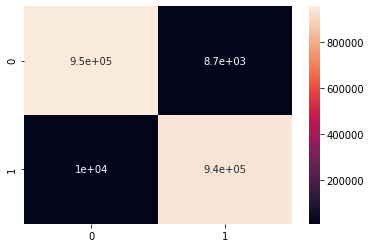

In [76]:
cm_knn = confusion_matrix(y_test, KN_pre)
print(cm_knn)
sns.heatmap(cm_knn, annot=True)

In [77]:
print(classification_report(y_test, KN_pre))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    963114
           1       0.99      0.99      0.99    953814

    accuracy                           0.99   1916928
   macro avg       0.99      0.99      0.99   1916928
weighted avg       0.99      0.99      0.99   1916928



In [78]:
test_prediction_knn = KN_classifier.predict(test_data)
print(test_prediction_knn)
print('With KNN ,accuracy is: ',KN_classifier.score(test_data,test_target))

[0 0 0 ... 0 0 0]
With KNN ,accuracy is:  0.8048288981119792


In [79]:
df2 = pd.DataFrame({'Actual Values': test_target, 'Predicted Values': test_prediction_knn})  
df2.head(10)

,Actual Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


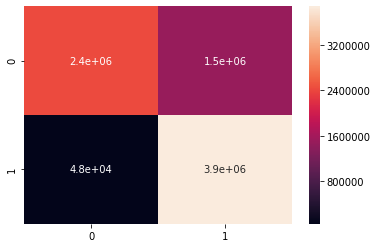

In [80]:
cm_test_Knn=confusion_matrix(test_target,test_prediction_knn)
cm_test_Knn
sns.heatmap(cm_test_Knn, annot=True)

In [81]:
Score[0][1]=KN_classifier.score(x_train,y_train) #training accuracy
Score[1][1]=KN_classifier.score(x_test,y_test) #validation accuracy
Score[2][1]=KN_classifier.score(test_data,test_target) #testing acccuracy

### DECISION TREE CLASSIFIER MODEL
#### Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

In [82]:
from sklearn.tree import DecisionTreeClassifier
DC_classifier = DecisionTreeClassifier()
DC_classifier.fit(x_train,y_train)
DC_pre=DC_classifier.predict(x_test)
print(DC_pre)
print('With Decision Tree')
print('Accuracy is: ',DC_classifier.score(x_test,y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, DC_pre))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, DC_pre)))

[1 0 1 ... 0 1 1]
With Decision Tree
Accuracy is:  1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0


[[963114      0]
 [     0 953814]]


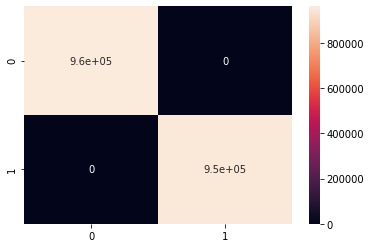

In [83]:
cm_dc = confusion_matrix(y_test, DC_pre)
print(cm_dc)
sns.heatmap(cm_dc, annot=True)

In [84]:
print(classification_report(y_test, DC_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    963114
           1       1.00      1.00      1.00    953814

    accuracy                           1.00   1916928
   macro avg       1.00      1.00      1.00   1916928
weighted avg       1.00      1.00      1.00   1916928



In [85]:
test_prediction_dc = DC_classifier.predict(test_data)
print(test_prediction_dc)
print('With Decison Tree, accuracy on test data is: ',DC_classifier.score(test_data,test_target))

[0 0 0 ... 0 0 0]
With Decison Tree, accuracy on test data is:  1.0


In [86]:
df3 = pd.DataFrame({'Actual Values': test_target, 'Predicted Values': test_prediction_dc})  
df3.head(10)

,Actual Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


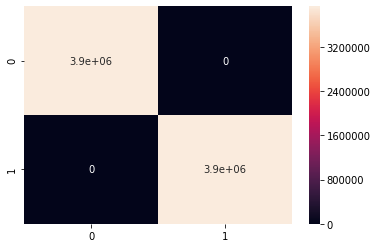

In [87]:
cm_test_dc=confusion_matrix(test_target,test_prediction_dc)
cm_test_dc
sns.heatmap(cm_test_dc, annot=True)

In [88]:
Score[0][2]=DC_classifier.score(x_train,y_train) #training accuracy
Score[1][2]=DC_classifier.score(x_test,y_test) #validation accuracy
Score[2][2]=DC_classifier.score(test_data,test_target) #testing acccuracy

### RANDOM FOREST CLASSIFIER MODEL
####  Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_prediction = rf.predict(x_test)
print(rf_prediction)
print('With Random Forest ') 
print('Accuracy is: ',rf.score(x_test,y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_prediction))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rf_prediction)))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1 0 1 ... 0 1 1]
With Random Forest 
Accuracy is:  1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0


[[963114      0]
 [     0 953814]]


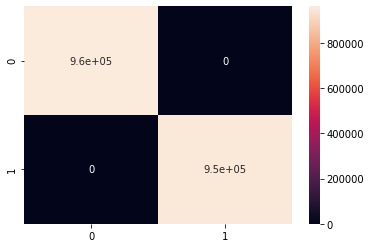

In [90]:
cm_rf = confusion_matrix(y_test, rf_prediction)
print(cm_rf)
sns.heatmap(cm_rf, annot=True)

In [91]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    963114
           1       1.00      1.00      1.00    953814

    accuracy                           1.00   1916928
   macro avg       1.00      1.00      1.00   1916928
weighted avg       1.00      1.00      1.00   1916928



In [92]:
test_prediction_rf = rf.predict(test_data)
print(test_prediction_rf)
print('With Random Forest, accuracy on test data is: ',rf.score(test_data,test_target))

[0 0 0 ... 0 0 0]
With Random Forest, accuracy on test data is:  0.9980742136637369


In [93]:
df4 = pd.DataFrame({'Actual Values': test_target, 'Predicted Values': test_prediction_rf})  
df4.head(10)

,Actual Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


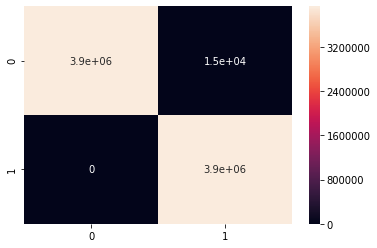

In [94]:
cm_test_rf=confusion_matrix(test_target,test_prediction_rf)
cm_test_rf
sns.heatmap(cm_test_rf, annot=True)

In [95]:
Score[0][3]=rf.score(x_train,y_train) #training accuracy
Score[1][3]=rf.score(x_test,y_test) #validation accuracy
Score[2][3]=rf.score(test_data,test_target) #testing acccuracy

### Stochastic Gradient Descent (SGD) CLASSIFIER MODEL
#### Stochastic gradient descent (SGD) approximate the gradient using only one data point. So, evaluating gradient saves a lot of time compared to summing over all data.

In [56]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
sgd_prediction = sgd.predict(x_test)
print(sgd_prediction)
print('With SGD Classifier ') 
print('Accuracy is: ',sgd.score(x_test,y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, sgd_prediction))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, sgd_prediction)))

[1 0 1 ... 0 1 1]
With SGD Classifier 
Accuracy is:  0.9951046674679487
Mean Absolute Error: 0.004895332532051282
Root Mean Squared Error: 0.06996665300020634


[[960070   3044]
 [  6340 947474]]


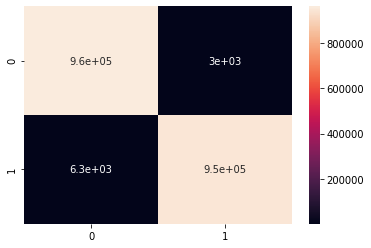

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
cm_sgd = confusion_matrix(y_test, sgd_prediction)
print(cm_sgd)
sns.heatmap(cm_sgd, annot=True)

In [58]:
print(classification_report(y_test, sgd_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    963114
           1       1.00      0.99      1.00    953814

    accuracy                           1.00   1916928
   macro avg       1.00      1.00      1.00   1916928
weighted avg       1.00      1.00      1.00   1916928



In [60]:
test_prediction_sgd= sgd.predict(test_data)
print(test_prediction_sgd)
print('With SGD Classifier, accuracy on test data is: ',sgd.score(test_data,test_target))

[0 0 0 ... 0 0 0]
With SGD Classifier, accuracy on test data is:  0.9717703501383463


In [67]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
df5 = pd.DataFrame({'Actual Values': test_target, 'Predicted Values': test_prediction_sgd})  
df5.head(10)

,Actual Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


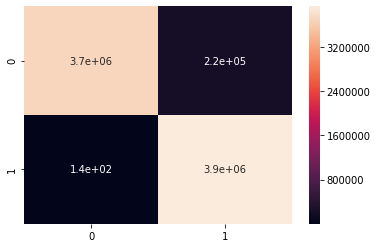

In [62]:
cm_test_sgd=confusion_matrix(test_target,test_prediction_sgd)
cm_test_sgd
sns.heatmap(cm_test_sgd, annot=True)

In [65]:
Score[0][4]=sgd.score(x_train,y_train) #training accuracy
Score[1][4]=sgd.score(x_test,y_test) #validation accuracy
Score[2][4]=sgd.score(test_data,test_target) #testing acccuracy

In [96]:
Data.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,0,34,0,-8.921,0,0,0,0,0.000000
1,6,0,34,1,-8.433,0,0,0,0,0.003906
2,7,0,34,2,-2.574,0,0,0,0,0.007812
3,8,0,34,3,5.239,0,0,0,0,0.011719
4,9,0,34,4,11.587,0,0,0,0,0.015625


### COMPARING THE ACCURACIES OF ALL THE MODELS

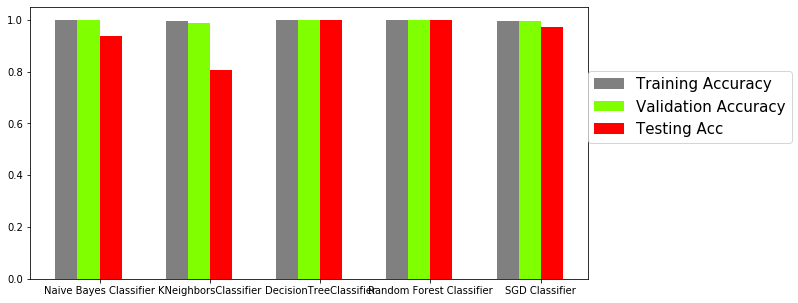

In [99]:
x=np.arange(5)
plt.figure(figsize=(10,5))
plt.bar(x+0.00,Score[0],width=0.20,color='gray',label='Training Accuracy')
plt.bar(x+0.20,Score[1],width=0.20,color='chartreuse',label='Validation Accuracy')
plt.bar(x+0.40,Score[2],width=0.20,color='r',label='Testing Acc')
plt.xticks([0.30,1.3,2.3,3.3,4.3],['Naive Bayes Classifier','KNeighborsClassifier','DecisionTreeClassifier','Random Forest Classifier','SGD Classifier'])
plt.legend(fontsize=15,loc=(1.0,0.5))
plt.show()

In [101]:
Data.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,0,34,0,-8.921,0,0,0,0,0.000000
1,6,0,34,1,-8.433,0,0,0,0,0.003906
2,7,0,34,2,-2.574,0,0,0,0,0.007812
3,8,0,34,3,5.239,0,0,0,0,0.011719
4,9,0,34,4,11.587,0,0,0,0,0.015625
